# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии. 

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр. 

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии. 
 
 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# Считываем файл в DataFrame



метод .read_csv(path,delimiter) 

In [3]:
df = pd.read_csv('content/cars_moldova_no_dup.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# EDA - Разведывательный анализ данных.

Цель разведывательного анализа данных - попытка предварительного понимания того, с чем вы имеете дело. Например, результатами анализа могут быть удаление аномалий, заполнение (удаление) пропусков, визуализация данных, выделение признаков или получение (или преобразование) новых признаков, удаление некоторых шумов, помех или других нерегулярных значений.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  37264 non-null  object 
 1   Model                 37264 non-null  object 
 2   Year                  37264 non-null  int64  
 3   Style                 37264 non-null  object 
 4   Distance              37264 non-null  float64
 5   Engine_capacity(cm3)  37264 non-null  float64
 6   Fuel_type             37264 non-null  object 
 7   Transmission          37264 non-null  object 
 8   Price(euro)           37264 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ MB


посмотрим на то, какие у нас есть категориальные и численные столбцы

In [5]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


## Анализ числовых признаков 

Статистика по числовым данным

In [6]:
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,37264.000000,3.726400e+04,37264.000000,3.726400e+04
mean,2007.709264,4.758488e+05,1858.932535,9.569387e+03
std,8.295806,4.591520e+06,707.662731,5.283315e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,9.000000e+04,1499.000000,3.300000e+03
50%,2009.000000,1.700000e+05,1800.000000,6.490000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.179900e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

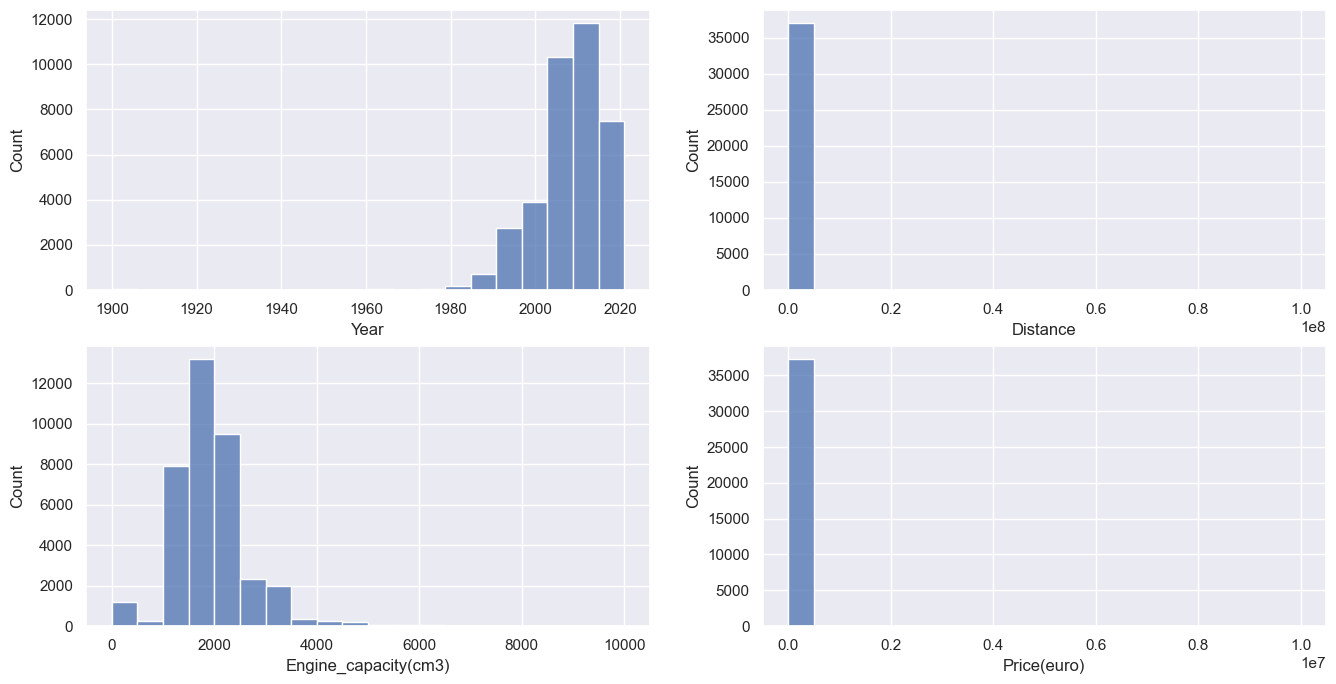

In [7]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20)

Столбцы имеют явные аномалии, особенно Distance и Price(euro). Чтобы лучше понять эти аномалии посмотрим на столбцы в логарифмическом масштабе.

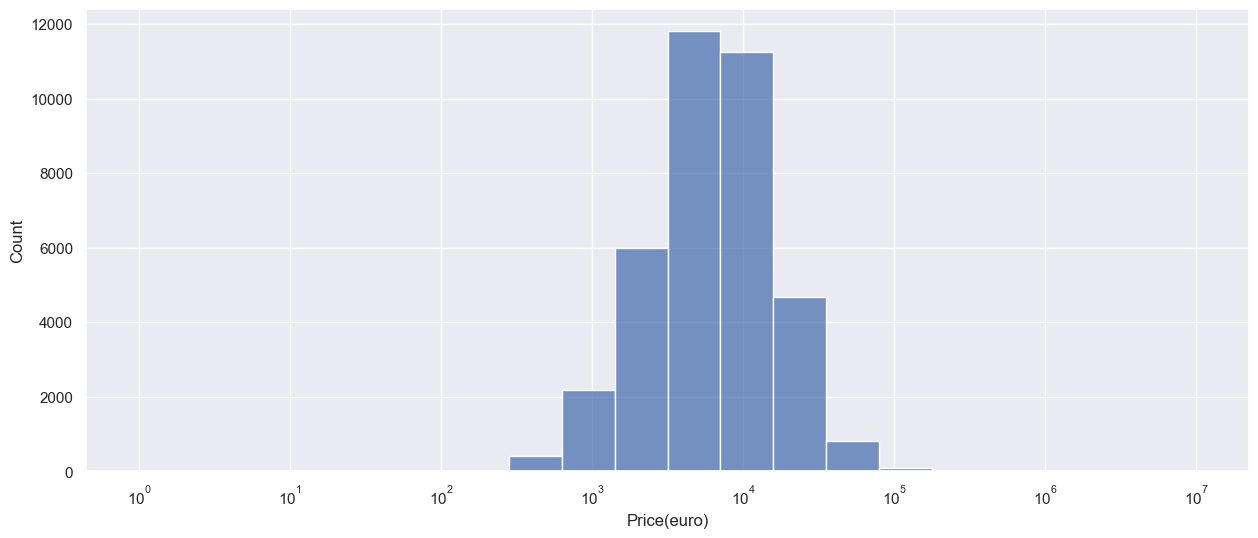

In [8]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, 
        x='Price(euro)', bins = 20, log_scale = True);

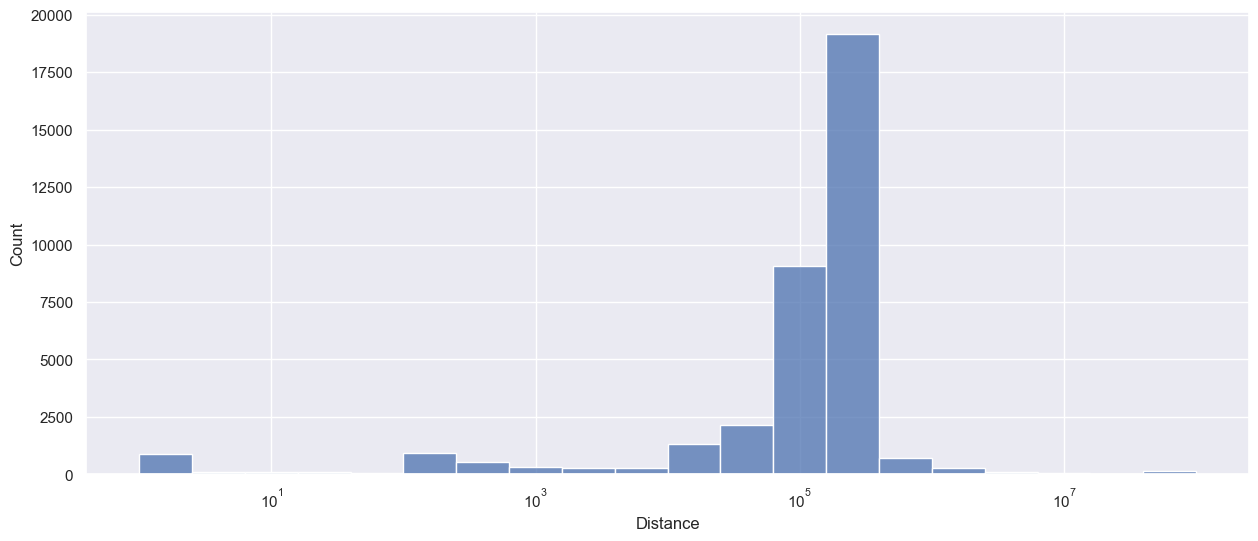

In [9]:
# Удалим те объекты у которых Расстояние равно 0
question_dist = df[df.Distance == 0]
df = df.drop(question_dist.index)

plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Distance', bins = 20, log_scale = True);

Теперь мы можем определить, что нам требуется, чтобы почистить столбцы. 

Также, так как задача хорошо интерпретируема мы можем почистить столбцы пользуясь здравым смыслом. 

Например, мы можем удалить записи, где цена меньше 100 евро или пробег меньше 1000 км и год старый.

In [10]:
# здравый смысл
question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
32529,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
32530,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
32531,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
32532,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


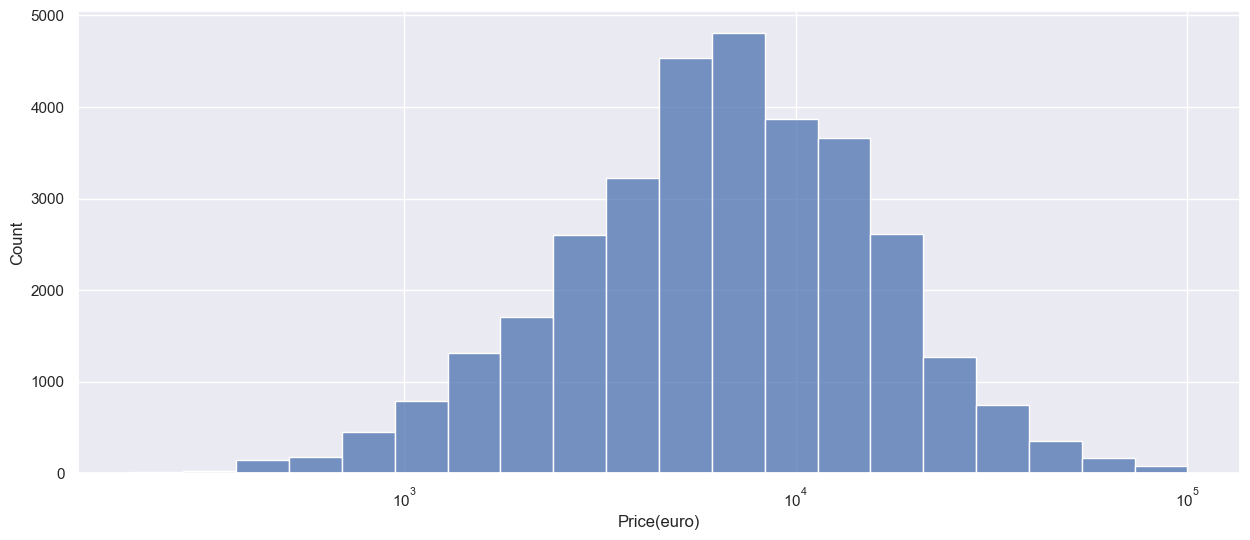

In [11]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Price(euro)', bins = 20, log_scale = True);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32534 entries, 0 to 32533
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32534 non-null  object 
 1   Model                 32534 non-null  object 
 2   Year                  32534 non-null  int64  
 3   Style                 32534 non-null  object 
 4   Distance              32534 non-null  float64
 5   Engine_capacity(cm3)  32534 non-null  float64
 6   Fuel_type             32534 non-null  object 
 7   Transmission          32534 non-null  object 
 8   Price(euro)           32534 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


Посмотрим на результат

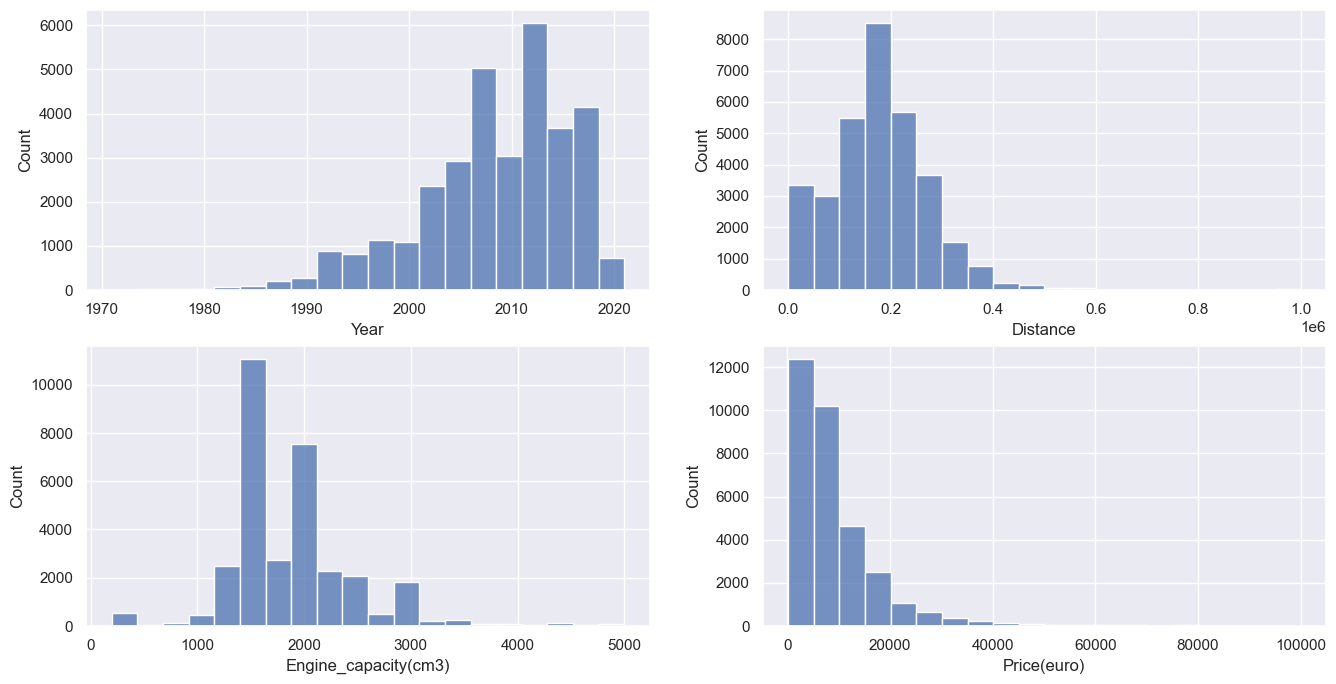

In [13]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

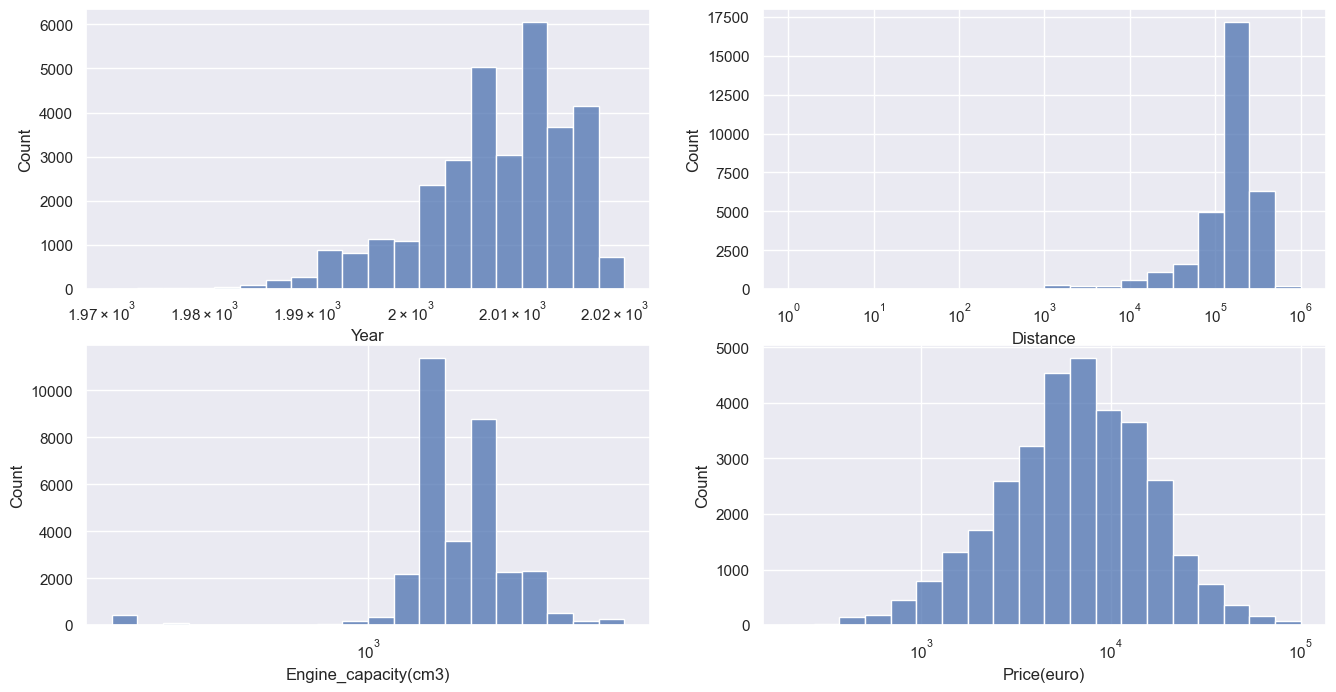

In [14]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20, log_scale = True);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32534 entries, 0 to 32533
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32534 non-null  object 
 1   Model                 32534 non-null  object 
 2   Year                  32534 non-null  int64  
 3   Style                 32534 non-null  object 
 4   Distance              32534 non-null  float64
 5   Engine_capacity(cm3)  32534 non-null  float64
 6   Fuel_type             32534 non-null  object 
 7   Transmission          32534 non-null  object 
 8   Price(euro)           32534 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


**Зависимости параметров друг от друга**

In [16]:
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
32529,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
32530,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
32531,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
32532,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


<Figure size 1500x1500 with 0 Axes>

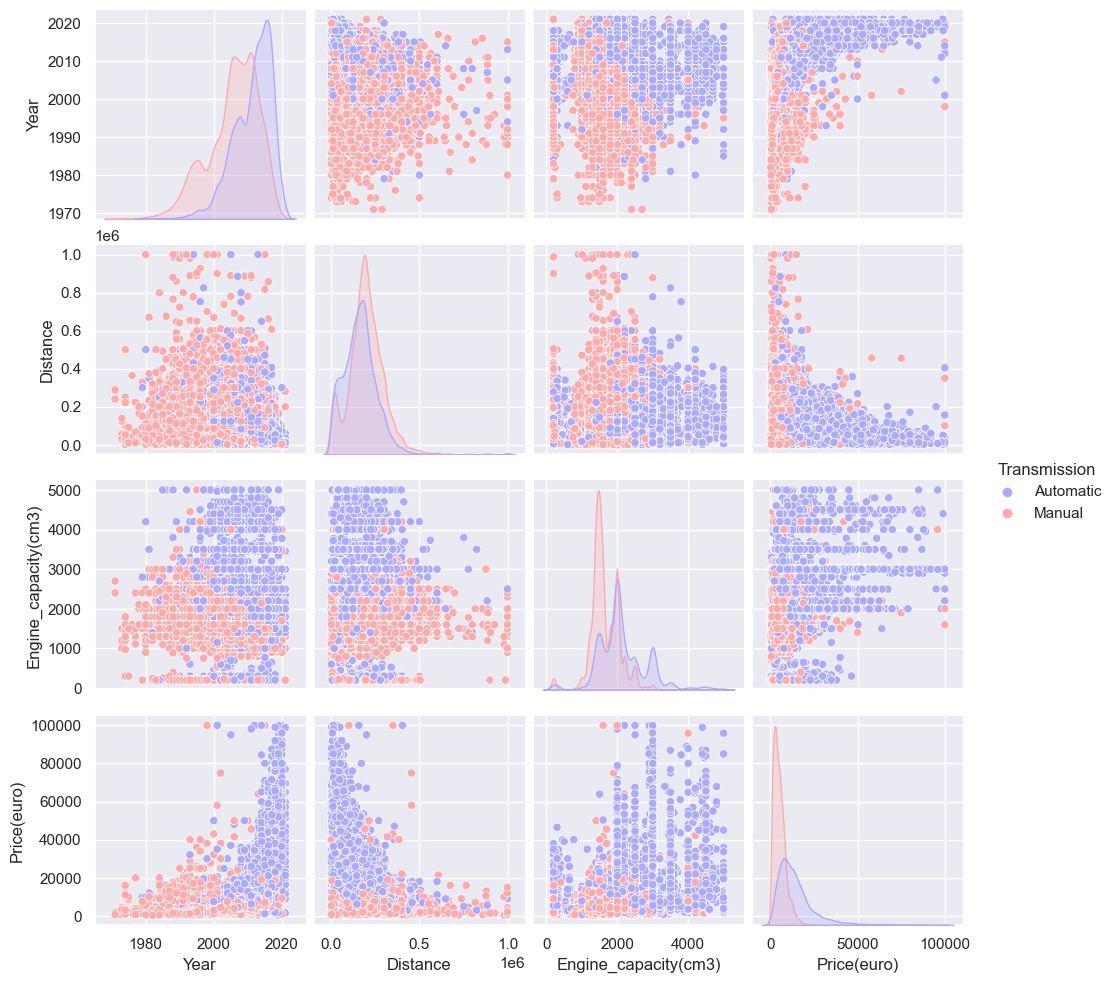

In [17]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, 
             hue ='Transmission',
             palette = 'bwr',);

In [18]:
# fig = plt.figure(figsize=(15,15))
# sns.pairplot(data = df, 
#              hue ='Style',
#              palette = 'bwr',);

# Предварительная Обработка

**Нормализация**

In [19]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

<AxesSubplot: xlabel='Distance', ylabel='Count'>

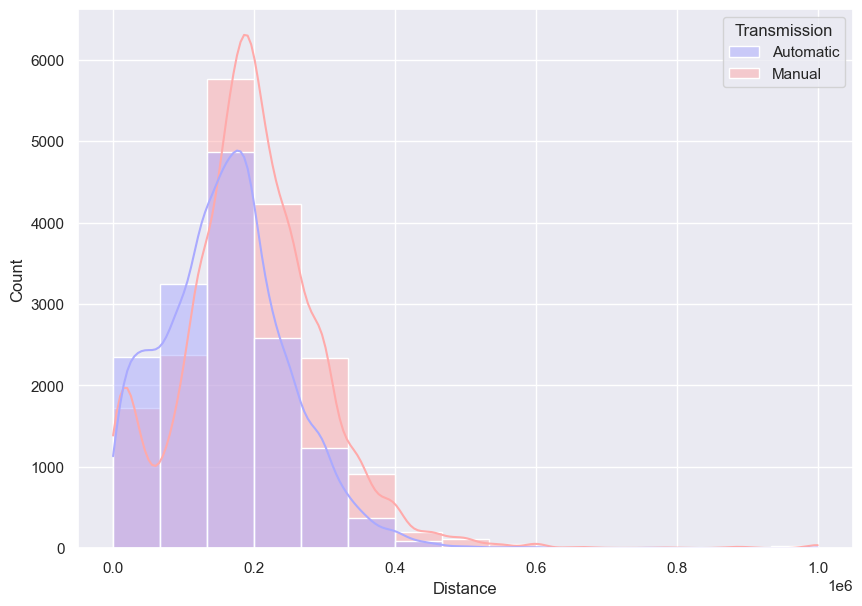

In [20]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

<AxesSubplot: xlabel='Distance', ylabel='Count'>

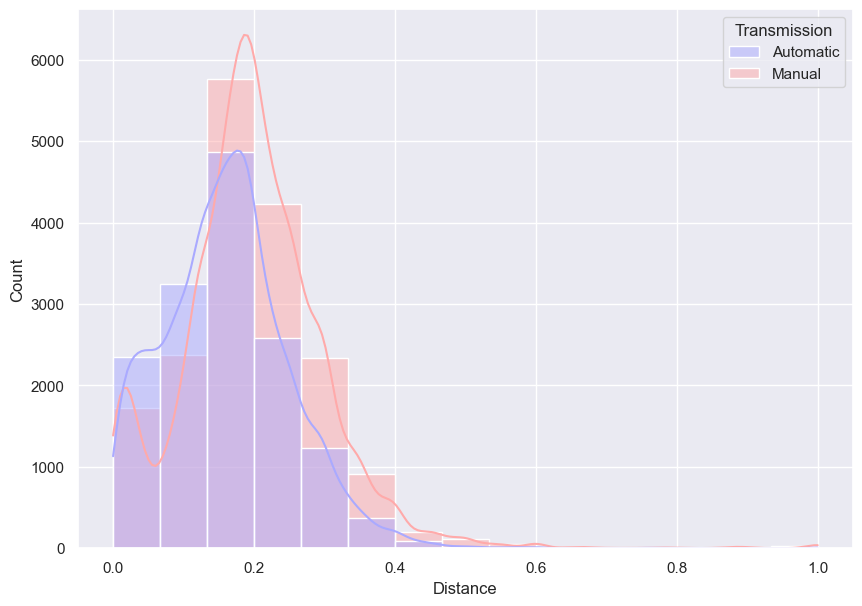

In [21]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

**Стандартизация**

In [22]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

<AxesSubplot: xlabel='Distance', ylabel='Count'>

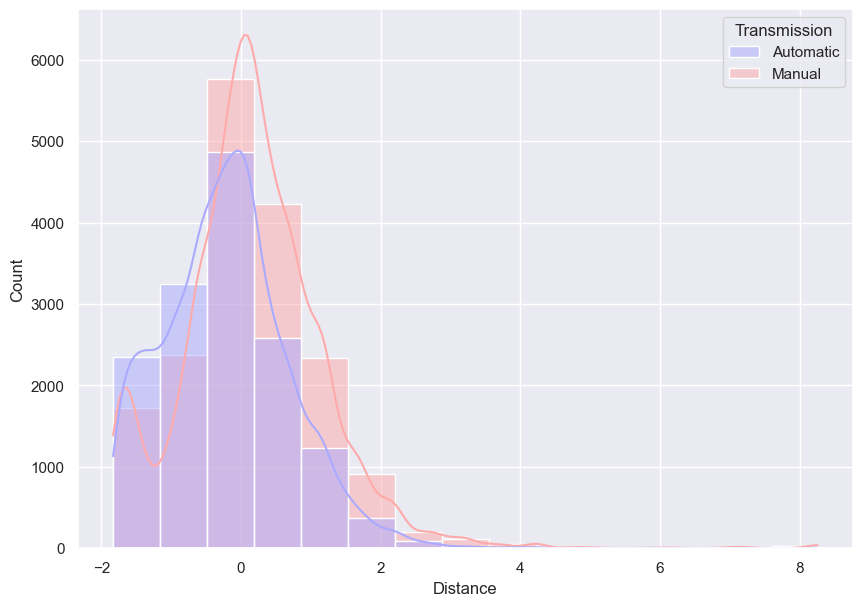

In [23]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Distance', 
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

**Нелинейное преобразование**

Сначала логарифмирование, потом стандартизация

<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

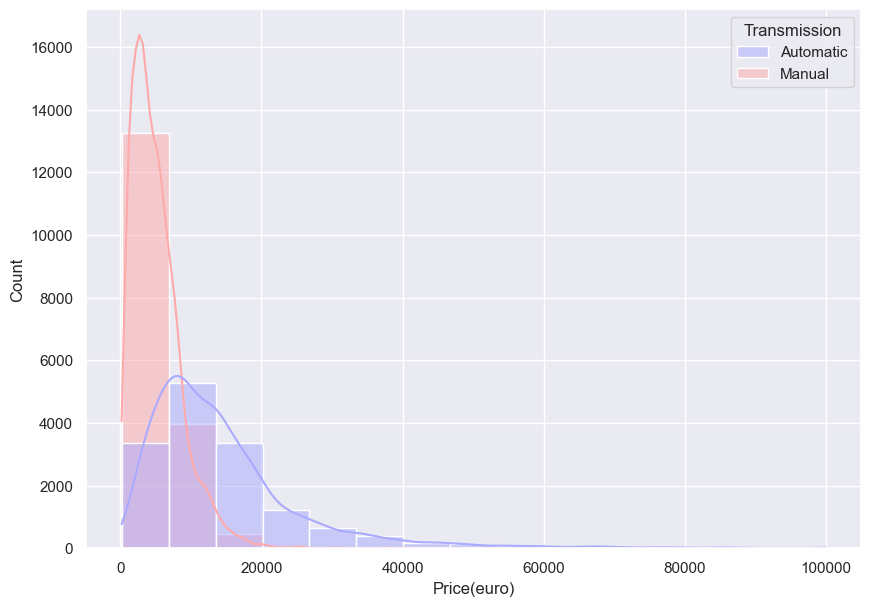

In [24]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df,
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr')


In [25]:
DF_power  = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD

<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

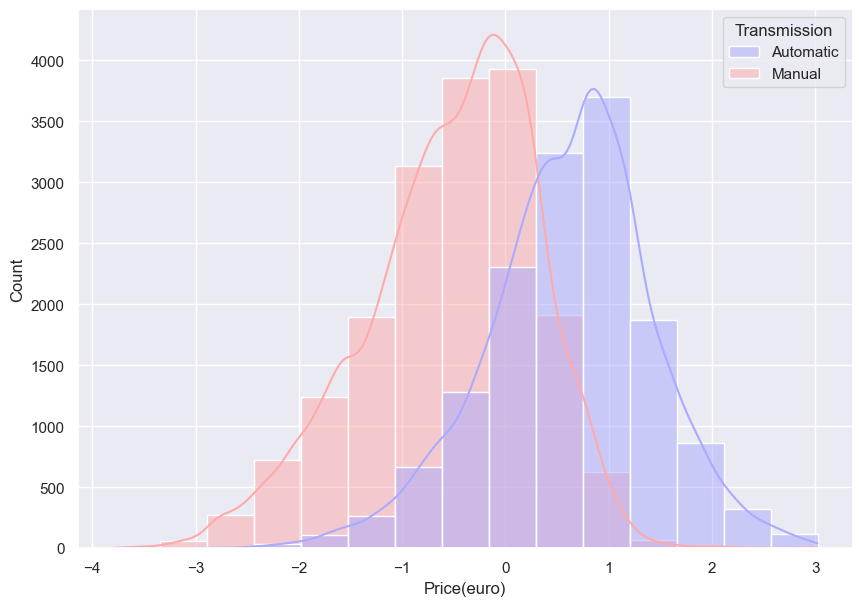

In [26]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = DF_power, 
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr')


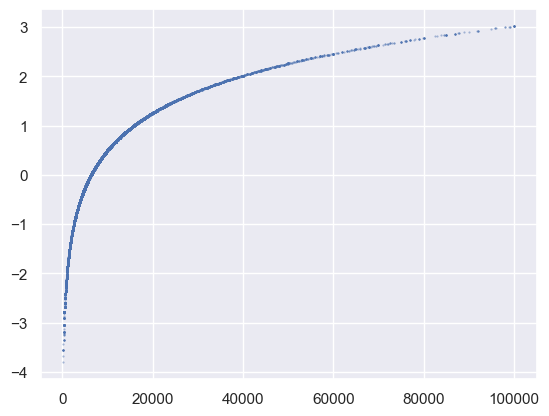

In [27]:
plt.plot(df['Price(euro)'], DF_power['Price(euro)'], '.', alpha = 0.5, markersize = 1)

### Добавление колонки
Зная суть или модель данных, мы можем предположить, чего нам не хватает - то есть попробовать добавить новый признак в данные. Такую операцию можно провести по-разному. В данном случае мы сделаем это исходя из логики. Введем признак пробег в год. \



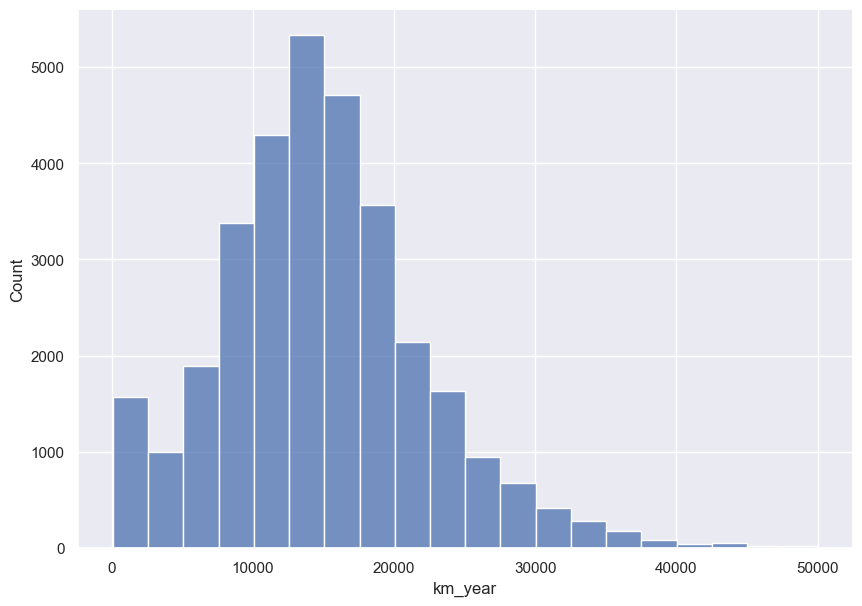

In [28]:
df['Age'] = 2022 - df.Year

df['km_year'] = df.Distance/df.Age
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)


plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year', bins = 20);

Отметим, что важно, чтобы новый признак был независим от других - иначе его потом придется удалить.

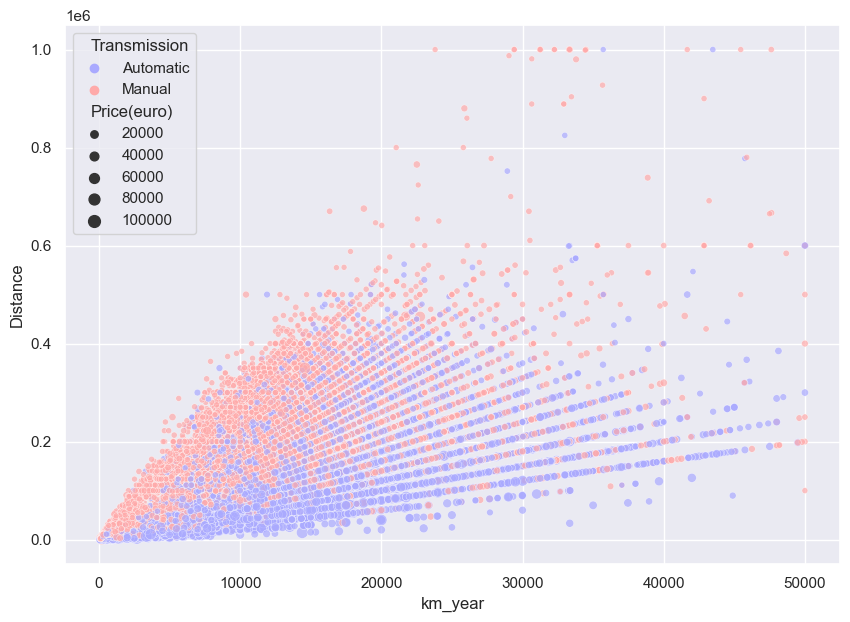

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="km_year", y="Distance",
    hue="Transmission", 
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

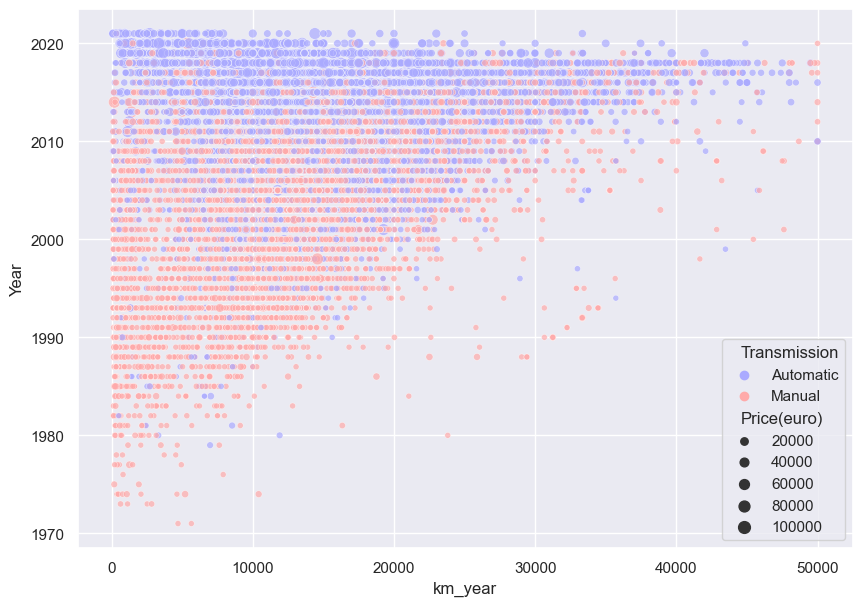

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="km_year", y="Year",
    hue="Transmission", 
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

### Удаление аномалий и связанных признаков.
Часто проведенного выше анализа данных бывает недостаточно. Помимо всего выше изложенного бывает необходимо удаление аномалий из данных.

Посмотрим на аномалии с использованием т.н. boxplot - метода 

In [31]:
num_columns.append('km_year')
num_columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

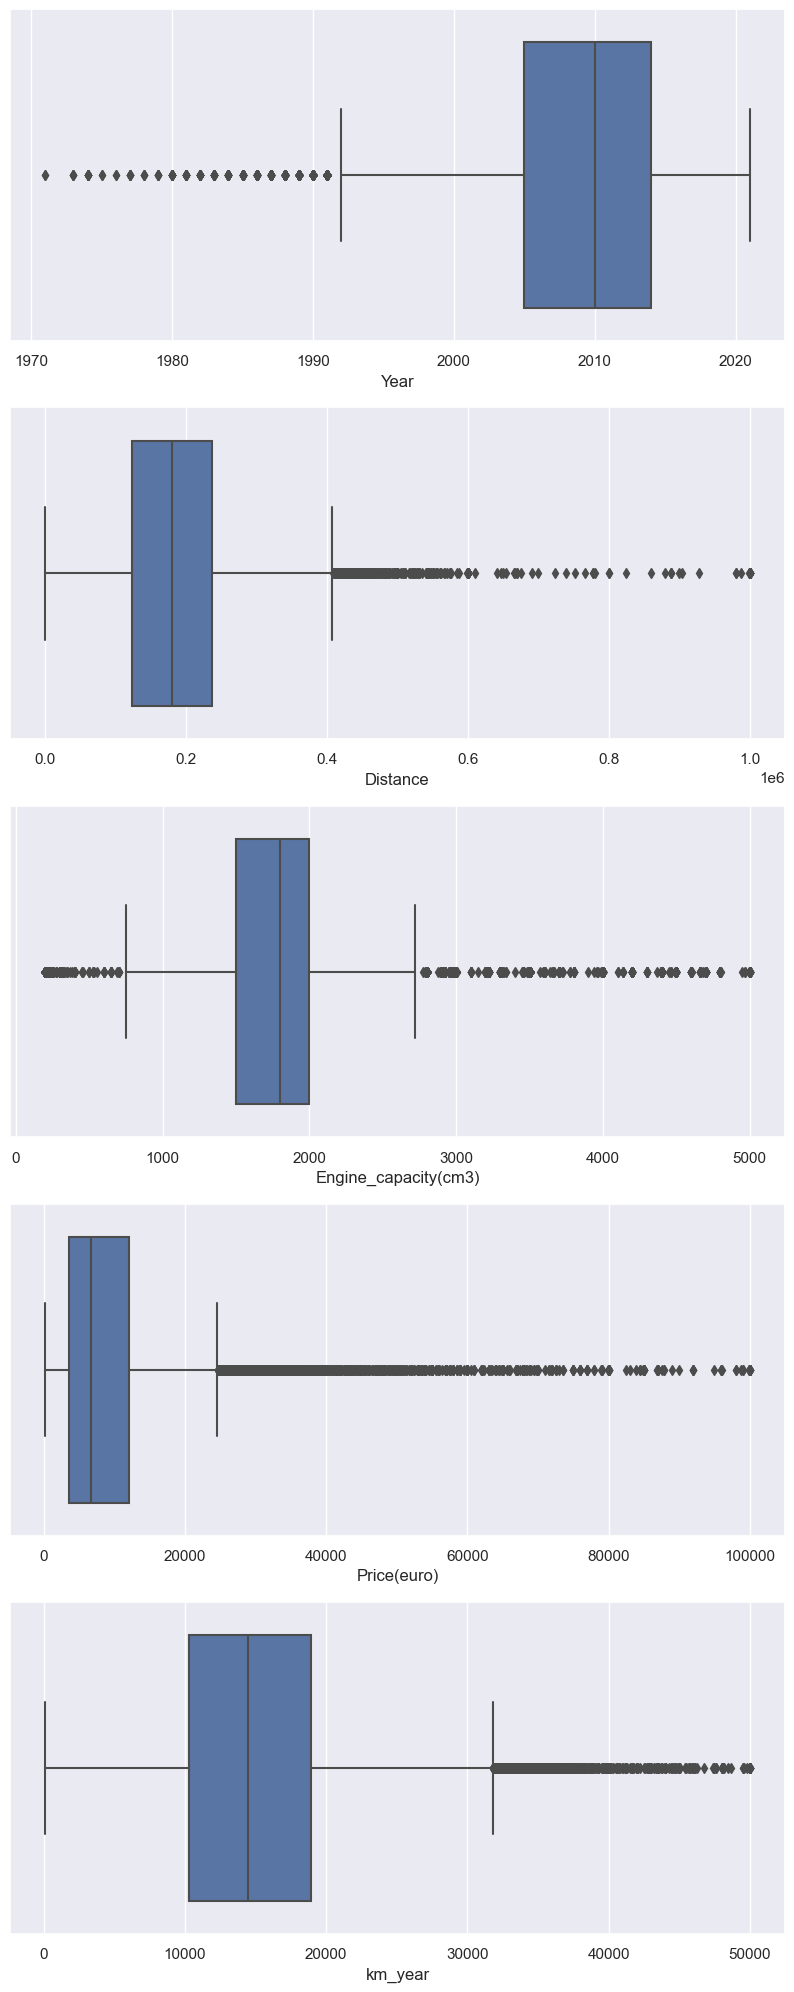

In [32]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

Отрежем Distance > 0.5e6

In [33]:
question_dist = df[(df['Distance'] > 0.5e6)]
df = df.drop(question_dist.index)
df = df.reset_index(drop=True)

Посмотрим как выглядят данные теперь:

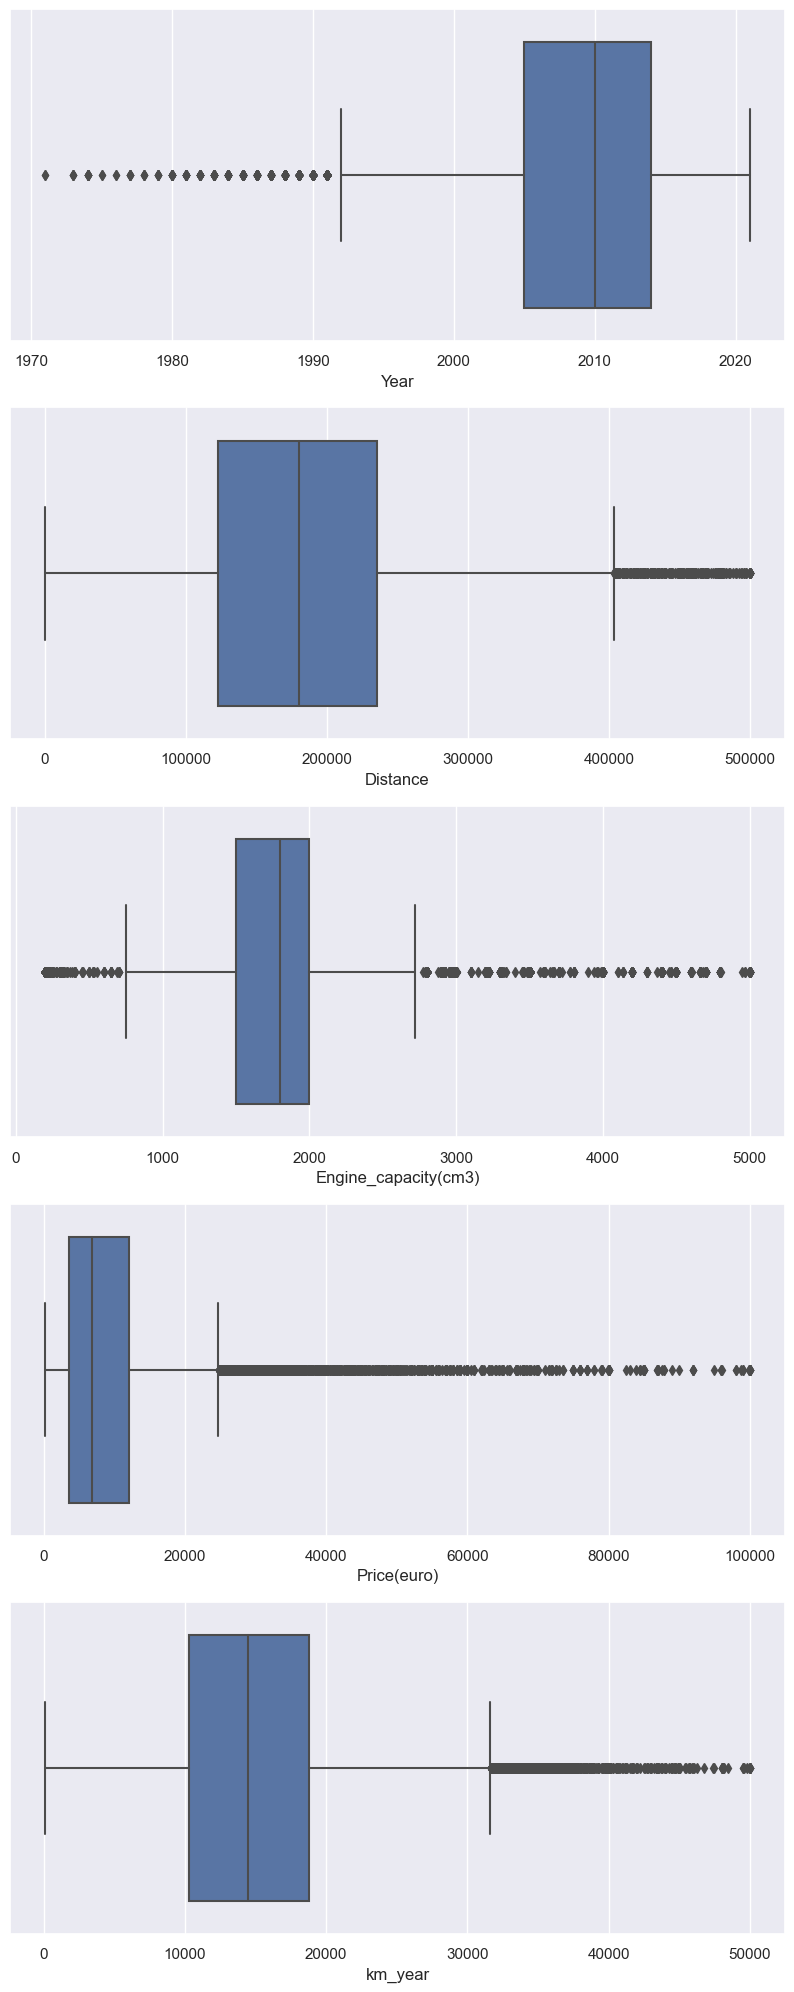

In [34]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

In [35]:
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32069,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32070,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
32071,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32072,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


Посмотрим на корреляцию численных столбцов

In [36]:
cm = sns.color_palette("vlag", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

C:\Users\argol\AppData\Local\Temp\ipykernel_18456\1253939384.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)


,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
Year,1.000000,-0.431808,-0.026269,0.551700,-1.000000,0.443895
Distance,-0.431808,1.000000,0.073667,-0.358394,0.431808,0.446684
Engine_capacity(cm3),-0.026269,0.073667,1.000000,0.383766,0.026269,-0.010049
Price(euro),0.551700,-0.358394,0.383766,1.000000,-0.551700,0.164468
Age,-1.000000,0.431808,0.026269,-0.551700,1.000000,-0.443895
km_year,0.443895,0.446684,-0.010049,0.164468,-0.443895,1.000000


## Категориальные данные
посмотрим на число повторений результата в каждом категориальном признаке

In [37]:
df[cat_columns].nunique()

Make             78
Model           777
Style            12
Fuel_type         6
Transmission      2
dtype: int64

Оказалось, что часть из наших признаков имеют слишком много записей. Вероятно, редкие из них можно исключить без потери точности. Мы сделаем эту операцию объявив такие записи одним типом - rare.

In [38]:
counts = df['Make'].value_counts()

counts

Volkswagen    3396
Toyota        3066
Mercedes      2993
BMW           2582
Renault       2344
              ... 
Abarth           1
Zotye            1
Tata             1
Saturn           1
Pontiac          1
Name: Make, Length: 78, dtype: int64

In [39]:
counts = df.Make.value_counts()

counts

Volkswagen    3396
Toyota        3066
Mercedes      2993
BMW           2582
Renault       2344
              ... 
Abarth           1
Zotye            1
Tata             1
Saturn           1
Pontiac          1
Name: Make, Length: 78, dtype: int64

In [40]:
counts.median()

32.5

In [41]:
counts[counts<100]

Rover               90
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Lincoln             49
Dodge               49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 30
Moskvich / Izh      29
Daihatsu            25
UAZ                 21
Chery               18
Great Wall          17
Lancia              17
Cadillac            16
Saab                15
Acura               14
Byd                 14
Brilliance          14
Alta marca          13
Zaz                 11
Lifan               10
Lada                 9
Isuzu                6
LuAZ                 5
GMC                  5
Buick                5
Ravon                5
Maserati             4
Geely                3
Haima                3
Scion                3
Hummer               3
Tesla                3
Datsun               3
Faw                  2
Mercedes-Maybach     2
ARO                  2
Groz       

In [42]:
rare =  counts[(counts.values < 25)]
df['Make'] = df['Make'].replace(rare.index.values, 'Rare')
df.Make.value_counts()

Volkswagen        3396
Toyota            3066
Mercedes          2993
BMW               2582
Renault           2344
Opel              1812
Skoda             1726
Audi              1538
Ford              1341
Dacia             1336
Nissan            1252
Hyundai           1216
Honda              887
KIA                654
Mitsubishi         611
Lexus              595
Volvo              574
Vaz                461
Mazda              437
Peugeot            387
Chevrolet          321
Citroen            295
Land Rover         285
Rare               250
Seat               239
Porsche            190
Fiat               183
Suzuki             152
Subaru             150
Rover               90
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 30
Moskvich / Izh      29
Daihatsu   

In [43]:
counts = df.Model.value_counts()

counts

E Class     1090
5 Series    1030
Passat       858
Megane       803
Astra        787
            ... 
Z Series       1
G Series       1
F-Type         1
90             1
Siber          1
Name: Model, Length: 777, dtype: int64

In [44]:
counts.median()

9.0

In [45]:
counts[counts<100]

Clio        97
X-Trail     93
Combo       88
Juke        88
A Class     87
            ..
Z Series     1
G Series     1
F-Type       1
90           1
Siber        1
Name: Model, Length: 704, dtype: int64

In [46]:
counts = df.Model.value_counts()
rare =  counts[(counts.values <  50)]
df['Model'] = df['Model'].replace(rare.index.values, 'Rare')
df.Model.value_counts()

Rare             6680
E Class          1090
5 Series         1030
Passat            858
Megane            803
                 ... 
Vento              51
Accent             51
Urban Cruiser      51
Matrix             50
Avensis Verso      50
Name: Model, Length: 134, dtype: int64

## Сохранение DataFrame в файл


Метод .to_csv(path, index) 

In [47]:
df.to_csv('content/cars_moldova_clean.csv',index=False)

# Приведение категориальных признаков к численным

### Бинарные признаки

In [48]:
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})

### Кодирование многозначных признаков (пространственное)

In [49]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32074 non-null  int8   
 1   Model                 32074 non-null  int16  
 2   Year                  32074 non-null  int64  
 3   Style                 32074 non-null  int8   
 4   Distance              32074 non-null  float64
 5   Engine_capacity(cm3)  32074 non-null  float64
 6   Fuel_type             32074 non-null  int8   
 7   Transmission          32074 non-null  int8   
 8   Price(euro)           32074 non-null  float64
 9   Age                   32074 non-null  int64  
 10  km_year               32074 non-null  float64
dtypes: float64(4), int16(1), int64(2), int8(4)
memory usage: 1.7 MB


In [50]:
df_se.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,11,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,8,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,10,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,16,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,22,13636.363636


In [51]:
# sns.pairplot(data = df_se, hue ='Transmission');

### One-hot кодирование многозначных признаков

In [52]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Age,km_year,Make_Alfa Romeo,Make_Audi,Make_BMW,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
32069,2016,88000.0,1800.0,1,11500.0,6,14666.666667,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32070,2002,225000.0,1800.0,0,4400.0,20,11250.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32071,2015,89000.0,1500.0,0,7000.0,7,12714.285714,0,0,0,...,0,0,0,1,1,0,0,0,0,0
32072,2006,370000.0,2000.0,0,4000.0,16,23125.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32073,2006,300000.0,1500.0,0,4000.0,16,18750.000000,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Columns: 203 entries, Year to Fuel_type_Plug-in Hybrid
dtypes: float64(4), int64(3), uint8(196)
memory usage: 7.7 MB


### Сохранение DataFrame в файл


Метод .to_csv(path, index) 

In [54]:
df_se.to_csv('content/cars_moldova_cat_num.csv',index=False)
df_ohe.to_csv('content/cars_moldova_onehot.csv',index=False)

# Контрольные вопросы